In [149]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [150]:
# List of asset symbols
assets = ['SPY', 'EFA', 'LQD', 'HYG', 'VNQ', 'REM', 'GLD', 'TLT', 'BIL']
asset_data = {}
data_folder = 'C:/Users/User/Desktop/CODE/option'


In [151]:
for asset in assets:
    file_path = os.path.join(data_folder, f'{asset}.csv')
    print(f"Attempting to read data for {asset} from: {file_path}")

    try:
        data = pd.read_csv(file_path, parse_dates=['Date'], index_col='Date')
        asset_data[asset] = data
    except Exception as e:
        print(f"Error reading data for {asset}: {e}")

Attempting to read data for SPY from: C:/Users/User/Desktop/CODE/option\SPY.csv
Attempting to read data for EFA from: C:/Users/User/Desktop/CODE/option\EFA.csv
Attempting to read data for LQD from: C:/Users/User/Desktop/CODE/option\LQD.csv
Attempting to read data for HYG from: C:/Users/User/Desktop/CODE/option\HYG.csv
Attempting to read data for VNQ from: C:/Users/User/Desktop/CODE/option\VNQ.csv
Attempting to read data for REM from: C:/Users/User/Desktop/CODE/option\REM.csv
Attempting to read data for GLD from: C:/Users/User/Desktop/CODE/option\GLD.csv
Attempting to read data for TLT from: C:/Users/User/Desktop/CODE/option\TLT.csv
Attempting to read data for BIL from: C:/Users/User/Desktop/CODE/option\BIL.csv


In [152]:
class AssetModule:
    def __init__(self, assets, data_folder):
        self.assets = assets
        self.data_folder = data_folder
        self.asset_data = {}

    def plot_monthly_returns(self, module_name):
        plt.figure(figsize=(10, 6))
        for asset, data in self.asset_data.items():
            if isinstance(data, pd.DataFrame) and 'Monthly Return' in data.columns:
                # Plotting the monthly returns for all assets
                plt.plot(data.index, data['Monthly Return'], label=asset)

        plt.title(f'Monthly Returns for {module_name} Module')
        plt.xlabel('Date')
        plt.ylabel('Monthly Return')
        plt.legend()
        plt.show()



    def fetch_data(self):
        for asset in self.assets:
            file_path = os.path.join(self.data_folder, f'{asset}.csv')

            try:
                data = pd.read_csv(file_path, parse_dates=['Date'], index_col='Date')
                self.asset_data[asset] = data
            except Exception as e:
                print(f"Error reading data for {asset}: {e}")

    def calculate_monthly_returns(self, start_date, end_date):
        for asset, data in self.asset_data.items():
        # Resample data to monthly frequency and calculate percentage change
            monthly_returns = data['Adj Close'].resample('M').ffill().pct_change()
        # Filter data within the specified date range
            data_range = monthly_returns.loc[start_date:end_date]
        # Drop rows with NaN values
            data_range = data_range.dropna()
        # Create a new DataFrame with the 'Monthly Return' column
            self.asset_data[asset] = pd.DataFrame({'Monthly Return': data_range})
    def calculate_relative_momentum_returns(self, start_date, end_date, holding_period=1, lookback_period=12):
        relative_momentum_returns = {}

        for i in range(holding_period, len(self.asset_data[self.assets[0]])):
            current_date = self.asset_data[self.assets[0]].index[i]

            # Calculate relative momentum for the current date
            relative_momentum = self.calculate_relative_momentum(start_date, current_date, lookback_period)

            # Determine the asset with the highest relative momentum
            best_performing_asset = max(relative_momentum, key=relative_momentum.get)

            # Calculate relative momentum returns for the selected asset
            selected_asset_cumulative_returns = (1 + self.asset_data[best_performing_asset]['Monthly Return']).cumprod() - 1
            relative_momentum_returns[current_date] = selected_asset_cumulative_returns[current_date]

        return pd.Series(relative_momentum_returns, index=self.asset_data[self.assets[0]].index[holding_period:])

    def calculate_absolute_momentum_returns(self, start_date, end_date, holding_period=1):
        absolute_momentum_returns = {}

        for i in range(holding_period, len(self.asset_data[self.assets[0]])):
            current_date = self.asset_data[self.assets[0]].index[i]

            # Calculate absolute momentum returns for each module
            absolute_momentum = self.calculate_absolute_momentum(start_date, current_date)

            # Determine the asset with the highest absolute momentum
            best_performing_asset = max(absolute_momentum, key=absolute_momentum.get)

            # Calculate absolute momentum returns for the selected asset
            selected_asset_cumulative_returns = (1 + self.asset_data[best_performing_asset]['Monthly Return']).cumprod() - 1
            absolute_momentum_returns[current_date] = selected_asset_cumulative_returns[current_date]

        return pd.Series(absolute_momentum_returns, index=self.asset_data[self.assets[0]].index[holding_period:])

    def calculate_relative_momentum(self, start_date, end_date, lookback_period):
        relative_momentum = {}

        for asset, data in self.asset_data.items():
            if isinstance(data, pd.DataFrame) and 'Monthly Return' in data.columns:
                # Calculate rolling sum of returns over the specified lookback period
                rolling_returns = data['Monthly Return'].loc[start_date:end_date].rolling(window=lookback_period).sum()

                # Get the last rolling return value
                last_rolling_return = rolling_returns.iloc[-1]

                # Store the relative momentum for the asset
                relative_momentum[asset] = last_rolling_return

        return relative_momentum
    def calculate_absolute_momentum(self, start_date, end_date):
        absolute_momentum = {}

        for asset, data in self.asset_data.items():
            if isinstance(data, pd.DataFrame) and 'Monthly Return' in data.columns:
                # Calculate rolling sum of returns over the entire period
                absolute_returns = data['Monthly Return'].loc[start_date:end_date].sum()

                # Store the absolute momentum for the asset
                absolute_momentum[asset] = absolute_returns

        return absolute_momentum

    def plot_momentum_returns(self, module_name, relative_momentum_returns, absolute_momentum_returns):
        plt.figure(figsize=(10, 6))
        for asset, data in self.asset_data.items():
            if isinstance(data, pd.DataFrame) and 'Monthly Return' in data.columns:
                # Plotting the monthly returns for all assets
                plt.plot(data.index, data['Monthly Return'], label=asset)

        plt.plot(relative_momentum_returns.index, relative_momentum_returns, label='Relative Momentum Returns', linestyle='--', color='black')
        plt.plot(absolute_momentum_returns.index, absolute_momentum_returns, label='Absolute Momentum Returns', linestyle='--', color='red')

        plt.title(f'Monthly Returns for {module_name} Module')
        plt.xlabel('Date')
        plt.ylabel('Monthly Return')
        plt.legend()
        plt.show()


    def display_data(self):
        for asset, data in self.asset_data.items():
            print(f"\nData for {asset}:")
            if isinstance(data, pd.DataFrame):
                # Print column names for DataFrame
                print("Column Names:", list(data.columns))
                print(data.head())
            elif isinstance(data, pd.Series):
                # Handle the case where data is a Series
                print(data.head())
            else:
                print("Unexpected data type:", type(data))
    
    def calculate_max_drawdown(self, absolute_momentum_returns):
        max_drawdowns = {}
        for asset, data in self.asset_data.items():
            if isinstance(data, pd.DataFrame) and 'Monthly Return' in data.columns:
                # Calculate max drawdown for the absolute momentum returns
                cumulative_returns = (1 + absolute_momentum_returns).cumprod()
                peak = cumulative_returns.expanding(min_periods=1).max()
                drawdown = (cumulative_returns - peak) / peak
                max_drawdown = drawdown.min()
                max_drawdowns[asset] = max_drawdown

        return max_drawdowns

    def calculate_sharpe_ratio(self, absolute_momentum_returns):
        sharpe_ratios = {}
        for asset, data in self.asset_data.items():
            if isinstance(data, pd.DataFrame) and 'Monthly Return' in data.columns:
                # Calculate Sharpe ratio for the absolute momentum returns
                annualized_return = absolute_momentum_returns.mean() * 12
                annualized_volatility = absolute_momentum_returns.std() * np.sqrt(12)
                sharpe_ratio = annualized_return / annualized_volatility
                sharpe_ratios[asset] = sharpe_ratio

        return sharpe_ratios

    def analyze_absolute_momentum_returns(self, absolute_momentum_returns):
        # Calculate and display max drawdown
        max_drawdowns = self.calculate_max_drawdown(absolute_momentum_returns)
        print(f"\nMax Drawdowns for {self.__class__.__name__} Module:")
        print(max_drawdowns)

        # Calculate and display Sharpe ratio
        sharpe_ratios = self.calculate_sharpe_ratio(absolute_momentum_returns)
        print(f"\nSharpe Ratios for {self.__class__.__name__} Module:")
        print(sharpe_ratios)

        # Display max drawdowns and Sharpe ratios in a table
        drawdown_df = pd.DataFrame(list(max_drawdowns.items()), columns=['Asset', 'Max Drawdown'])
        sharpe_df = pd.DataFrame(list(sharpe_ratios.items()), columns=['Asset', 'Sharpe Ratio'])
        results_df = pd.merge(drawdown_df, sharpe_df, on='Asset')
        print(f"\nAnalysis for {self.__class__.__name__} Module:")
        print(results_df)

In [153]:
class StockAssetModule(AssetModule):
    def __init__(self, data_folder):
        # Remove duplicate entries for 'SPY' and 'EFA'
        assets = list(set(['SPY', 'EFA']))
        super().__init__(assets, data_folder)
    def plot_monthly_returns(self):
        super().plot_monthly_returns("Stock")
    
    def calculate_and_plot_metrics(self, start_date, end_date, holding_period=1, lookback_period=12):
        # Calculate cumulative returns
        cumulative_returns = {}
        for asset, data in self.asset_data.items():
            cumulative_returns[asset] = (1 + data['Monthly Return']).cumprod() - 1

        # Calculate relative momentum returns
        relative_momentum_returns = self.calculate_relative_momentum_returns(start_date, end_date, holding_period, lookback_period)

        # Calculate absolute momentum returns
        absolute_momentum_returns = self.calculate_absolute_momentum_returns(start_date, end_date, holding_period)

        # Plot cumulative returns, relative momentum, and absolute momentum
        plt.figure(figsize=(12, 8))
        for asset in ['SPY', 'EFA']:
            plt.plot(self.asset_data[asset].index, cumulative_returns[asset], label=f'{asset} Cumulative Returns')
        plt.plot(relative_momentum_returns.index, relative_momentum_returns, label='Relative Momentum Returns', linestyle='--', color='black')
        plt.plot(absolute_momentum_returns.index, absolute_momentum_returns, label='Absolute Momentum Returns', linestyle='--', color='red')

        plt.title('Cumulative Returns and Momentum Metrics for StockAssetModule')
        plt.xlabel('Date')
        plt.ylabel('Returns')
        plt.legend()
        plt.show()

In [154]:
class CreditRiskAssetModule(AssetModule):
    def __init__(self, data_folder):
        # Remove duplicate entries for 'LQD' and 'HYG'
        assets = list(set(['LQD', 'HYG']))
        super().__init__(assets, data_folder)
    def plot_monthly_returns(self):
        super().plot_monthly_returns("Credit Risk")
    def calculate_and_plot_metrics(self, start_date, end_date, holding_period=1, lookback_period=12):
        # Calculate cumulative returns
        cumulative_returns = {}
        for asset, data in self.asset_data.items():
            cumulative_returns[asset] = (1 + data['Monthly Return']).cumprod() - 1

        # Calculate relative momentum returns
        relative_momentum_returns = self.calculate_relative_momentum_returns(start_date, end_date, holding_period, lookback_period)

        # Calculate absolute momentum returns
        absolute_momentum_returns = self.calculate_absolute_momentum_returns(start_date, end_date, holding_period)

        # Plot cumulative returns, relative momentum, and absolute momentum
        plt.figure(figsize=(12, 8))
        for asset in ['LQD', 'HYG']:
            plt.plot(self.asset_data[asset].index, cumulative_returns[asset], label=f'{asset} Cumulative Returns')
        plt.plot(relative_momentum_returns.index, relative_momentum_returns, label='Relative Momentum Returns', linestyle='--', color='black')
        plt.plot(absolute_momentum_returns.index, absolute_momentum_returns, label='Absolute Momentum Returns', linestyle='--', color='red')

        plt.title('Cumulative Returns and Momentum Metrics for CreditRiskAssetModule')
        plt.xlabel('Date')
        plt.ylabel('Returns')
        plt.legend()
        plt.show()

In [155]:
class RealEstateAssetModule(AssetModule):
    def __init__(self, data_folder):
        # Remove duplicate entries for 'VNQ' and 'REM'
        assets = list(set(['VNQ', 'REM']))
        super().__init__(assets, data_folder)
    def plot_monthly_returns(self):
        super().plot_monthly_returns("Real Estate")
    def calculate_and_plot_metrics(self, start_date, end_date, holding_period=1, lookback_period=12):
        # Calculate cumulative returns
        cumulative_returns = {}
        for asset, data in self.asset_data.items():
            cumulative_returns[asset] = (1 + data['Monthly Return']).cumprod() - 1

        # Calculate relative momentum returns
        relative_momentum_returns = self.calculate_relative_momentum_returns(start_date, end_date, holding_period, lookback_period)

        # Calculate absolute momentum returns
        absolute_momentum_returns = self.calculate_absolute_momentum_returns(start_date, end_date, holding_period)

        # Plot cumulative returns, relative momentum, and absolute momentum
        plt.figure(figsize=(12, 8))
        for asset in ['REM', 'VNQ']:
            plt.plot(self.asset_data[asset].index, cumulative_returns[asset], label=f'{asset} Cumulative Returns')
        plt.plot(relative_momentum_returns.index, relative_momentum_returns, label='Relative Momentum Returns', linestyle='--', color='black')
        plt.plot(absolute_momentum_returns.index, absolute_momentum_returns, label='Absolute Momentum Returns', linestyle='--', color='red')

        plt.title('Cumulative Returns and Momentum Metrics for RealEstateAssetModule')
        plt.xlabel('Date')
        plt.ylabel('Returns')
        plt.legend()
        plt.show()

In [156]:
class HedgeAssetModule(AssetModule):
    def __init__(self, data_folder):
        # Remove duplicate entries for 'TLT' and 'GLD'
        assets = list(set(['TLT', 'GLD']))
        super().__init__(assets, data_folder)
    def plot_monthly_returns(self):
        super().plot_monthly_returns("Hedge")
    def calculate_and_plot_metrics(self, start_date, end_date, holding_period=1, lookback_period=12):
        # Calculate cumulative returns
        cumulative_returns = {}
        for asset, data in self.asset_data.items():
            cumulative_returns[asset] = (1 + data['Monthly Return']).cumprod() - 1

        # Calculate relative momentum returns
        relative_momentum_returns = self.calculate_relative_momentum_returns(start_date, end_date, holding_period, lookback_period)

        # Calculate absolute momentum returns
        absolute_momentum_returns = self.calculate_absolute_momentum_returns(start_date, end_date, holding_period)

        # Plot cumulative returns, relative momentum, and absolute momentum
        plt.figure(figsize=(12, 8))
        for asset in ['GLD', 'TLT']:
            plt.plot(self.asset_data[asset].index, cumulative_returns[asset], label=f'{asset} Cumulative Returns')
        plt.plot(relative_momentum_returns.index, relative_momentum_returns, label='Relative Momentum Returns', linestyle='--', color='black')
        plt.plot(absolute_momentum_returns.index, absolute_momentum_returns, label='Absolute Momentum Returns', linestyle='--', color='red')

        plt.title('Cumulative Returns and Momentum Metrics for HedgeAssetModule')
        plt.xlabel('Date')
        plt.ylabel('Returns')
        plt.legend()
        plt.show()

In [157]:
class ShortTermUSBondAssetModule(AssetModule):
    def __init__(self, data_folder):
        # Remove duplicate entry for 'BIL'
        assets = list(set(['BIL']))
        super().__init__(assets, data_folder)

    def plot_monthly_returns(self):
        super().plot_monthly_returns("Short-Term US Bond")

In [158]:
start_date = '2007-12-31'
end_date = '2022-12-31'
holding_period=1

# Instantiate asset modules
stock_module = StockAssetModule(data_folder)
credit_risk_module = CreditRiskAssetModule(data_folder)
real_estate_module = RealEstateAssetModule(data_folder)
hedge_module = HedgeAssetModule(data_folder)
short_term_us_bond_module = ShortTermUSBondAssetModule(data_folder)

# Fetch and display data for each module
modules = [stock_module, credit_risk_module, real_estate_module, hedge_module, short_term_us_bond_module]



Data for SPY:
Column Names: ['Monthly Return']
            Monthly Return
Date                      
2008-02-29       -0.025842
2008-03-31       -0.008943
2008-04-30        0.047662
2008-05-31        0.015117
2008-06-30       -0.083576

Data for EFA:
Column Names: ['Monthly Return']
            Monthly Return
Date                      
2008-02-29       -0.010229
2008-03-31        0.004190
2008-04-30        0.054381
2008-05-31        0.011872
2008-06-30       -0.087868


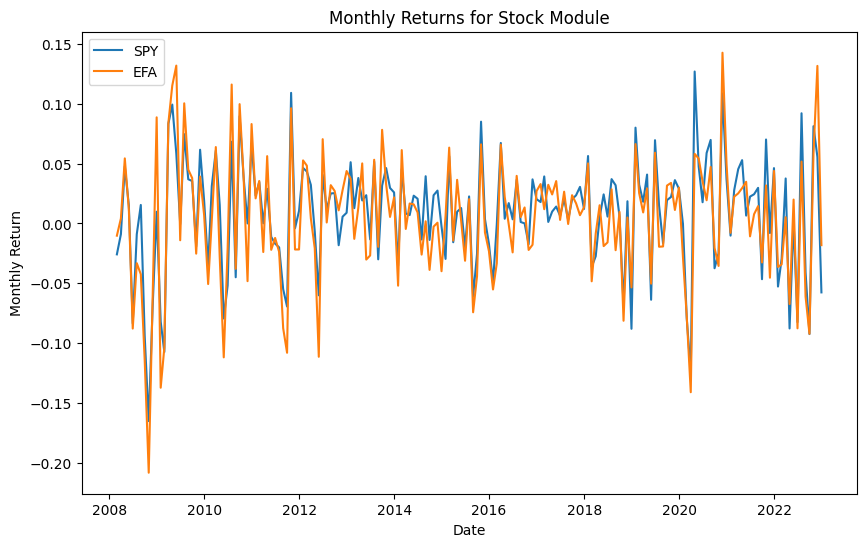


Absolute Momentum Returns for StockAssetModule Module:
Date
2008-03-31   -0.006082
2008-04-30    0.047968
2008-05-31    0.060409
2008-06-30   -0.032767
2008-07-31   -0.064881
                ...   
2022-08-31    2.828495
2022-09-30    2.474566
2022-10-31    2.756963
2022-11-30    2.965819
2022-12-31    2.737276
Freq: M, Length: 178, dtype: float64

Max Drawdowns for StockAssetModule Module:
{'SPY': -0.9993385393373161, 'EFA': -0.9993385393373161}

Sharpe Ratios for StockAssetModule Module:
{'SPY': 3.2046261210560445, 'EFA': 3.2046261210560445}

Analysis for StockAssetModule Module:
  Asset  Max Drawdown  Sharpe Ratio
0   SPY     -0.999339      3.204626
1   EFA     -0.999339      3.204626

Data for HYG:
Column Names: ['Monthly Return']
            Monthly Return
Date                      
2008-02-29       -0.018693
2008-03-31        0.009461
2008-04-30        0.033969
2008-05-31       -0.005085
2008-06-30       -0.036747

Data for LQD:
Column Names: ['Monthly Return']
            Month

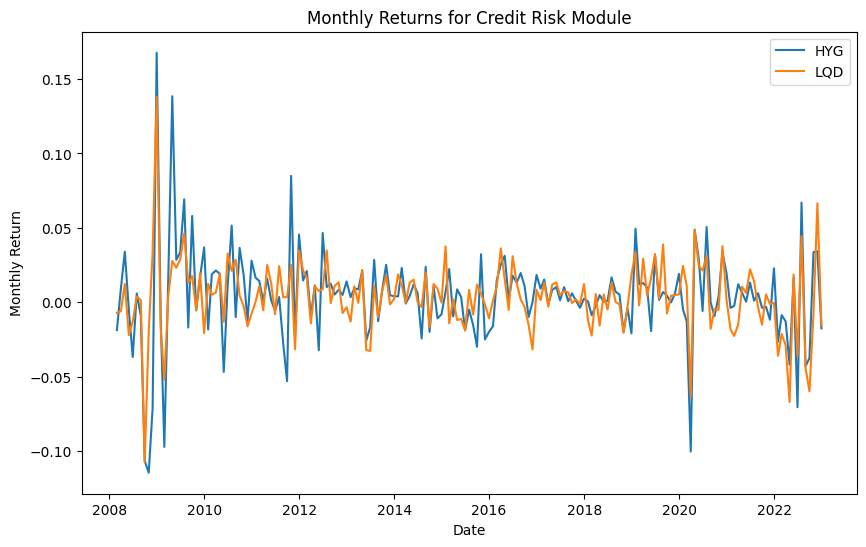


Absolute Momentum Returns for CreditRiskAssetModule Module:
Date
2008-03-31   -0.009409
2008-04-30    0.024241
2008-05-31    0.019032
2008-06-30   -0.018414
2008-07-31   -0.012620
                ...   
2022-08-31    0.880842
2022-09-30    0.810492
2022-10-31    0.871429
2022-11-30    0.935643
2022-12-31    0.901635
Freq: M, Length: 178, dtype: float64

Max Drawdowns for CreditRiskAssetModule Module:
{'HYG': -0.5049604791497679, 'LQD': -0.5049604791497679}

Sharpe Ratios for CreditRiskAssetModule Module:
{'HYG': 5.667921364931988, 'LQD': 5.667921364931988}

Analysis for CreditRiskAssetModule Module:
  Asset  Max Drawdown  Sharpe Ratio
0   HYG      -0.50496      5.667921
1   LQD      -0.50496      5.667921

Data for VNQ:
Column Names: ['Monthly Return']
            Monthly Return
Date                      
2008-02-29       -0.031814
2008-03-31        0.064853
2008-04-30        0.063792
2008-05-31       -0.002109
2008-06-30       -0.106155

Data for REM:
Column Names: ['Monthly Return']

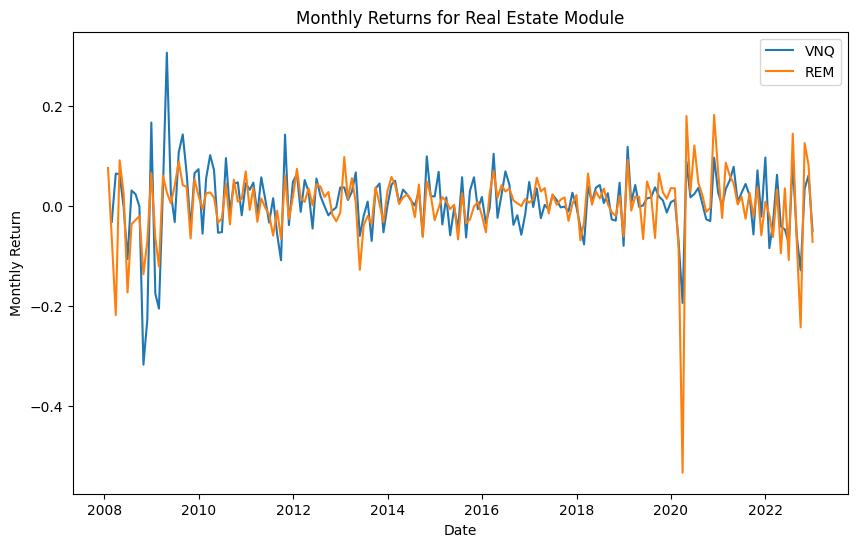


Absolute Momentum Returns for RealEstateAssetModule Module:
Date
2008-03-31    0.030976
2008-04-30    0.096744
2008-05-31    0.094431
2008-06-30   -0.021748
2008-07-31    0.008729
                ...   
2022-08-31    1.780680
2022-09-30    1.422770
2022-10-31    1.507689
2022-11-30    1.661813
2022-12-31    1.527809
Freq: M, Length: 178, dtype: float64

Max Drawdowns for RealEstateAssetModule Module:
{'VNQ': -0.9996563533359734, 'REM': -0.9996563533359734}

Sharpe Ratios for RealEstateAssetModule Module:
{'VNQ': 3.85004746414718, 'REM': 3.85004746414718}

Analysis for RealEstateAssetModule Module:
  Asset  Max Drawdown  Sharpe Ratio
0   VNQ     -0.999656      3.850047
1   REM     -0.999656      3.850047

Data for GLD:
Column Names: ['Monthly Return']
            Monthly Return
Date                      
2008-01-31        0.108416
2008-02-29        0.052298
2008-03-31       -0.059992
2008-04-30       -0.041588
2008-05-31        0.009232

Data for TLT:
Column Names: ['Monthly Return']
 

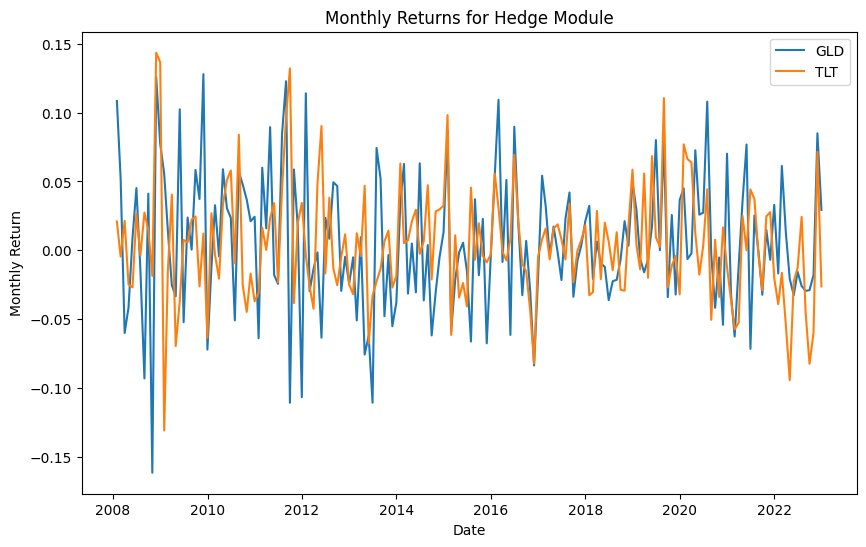


Absolute Momentum Returns for HedgeAssetModule Module:
Date
2008-02-29    0.166384
2008-03-31    0.096410
2008-04-30    0.050813
2008-05-31    0.060514
2008-06-30    0.108416
                ...   
2022-08-31    0.931482
2022-09-30    0.875697
2022-10-31    0.842227
2022-11-30    0.998666
2022-12-31    1.057240
Freq: M, Length: 179, dtype: float64

Max Drawdowns for HedgeAssetModule Module:
{'GLD': 0.0, 'TLT': 0.0}

Sharpe Ratios for HedgeAssetModule Module:
{'GLD': 7.3377692850900145, 'TLT': 7.3377692850900145}

Analysis for HedgeAssetModule Module:
  Asset  Max Drawdown  Sharpe Ratio
0   GLD           0.0      7.337769
1   TLT           0.0      7.337769


In [159]:
# Fetch and display data for each module
modules = [stock_module, credit_risk_module, real_estate_module, hedge_module]

# Initialize an empty DataFrame to store absolute momentum returns for each module
composite_returns = pd.DataFrame()

for module in modules:
    module.fetch_data()
    module.calculate_monthly_returns(start_date, end_date)
    module.display_data()
    module.plot_monthly_returns()

    # Calculate and display absolute momentum returns
    absolute_momentum_returns = module.calculate_absolute_momentum_returns(start_date, end_date, holding_period)
    print(f"\nAbsolute Momentum Returns for {module.__class__.__name__} Module:")
    print(absolute_momentum_returns)
    module.analyze_absolute_momentum_returns(absolute_momentum_returns)
    composite_returns[module.__class__.__name__] = absolute_momentum_returns


Data for SPY:
Column Names: ['Monthly Return']
            Monthly Return
Date                      
2008-02-29       -0.025842
2008-03-31       -0.008943
2008-04-30        0.047662
2008-05-31        0.015117
2008-06-30       -0.083576

Data for EFA:
Column Names: ['Monthly Return']
            Monthly Return
Date                      
2008-02-29       -0.010229
2008-03-31        0.004190
2008-04-30        0.054381
2008-05-31        0.011872
2008-06-30       -0.087868


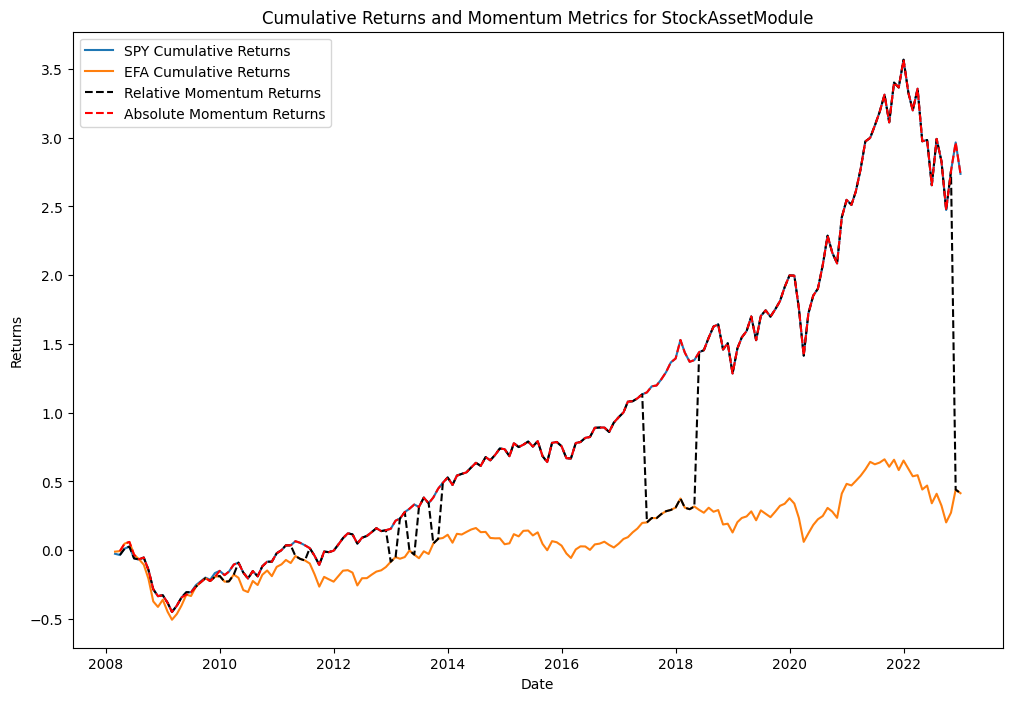


Data for HYG:
Column Names: ['Monthly Return']
            Monthly Return
Date                      
2008-02-29       -0.018693
2008-03-31        0.009461
2008-04-30        0.033969
2008-05-31       -0.005085
2008-06-30       -0.036747

Data for LQD:
Column Names: ['Monthly Return']
            Monthly Return
Date                      
2008-02-29       -0.007063
2008-03-31       -0.005972
2008-04-30        0.012447
2008-05-31       -0.022051
2008-06-30       -0.012917


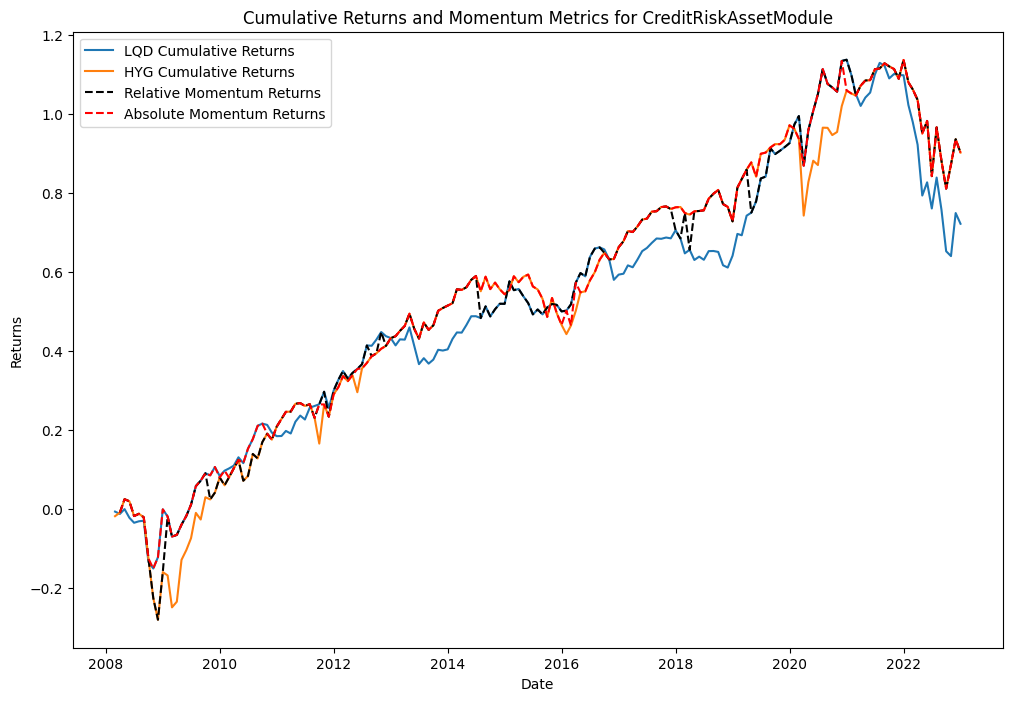


Data for VNQ:
Column Names: ['Monthly Return']
            Monthly Return
Date                      
2008-02-29       -0.031814
2008-03-31        0.064853
2008-04-30        0.063792
2008-05-31       -0.002109
2008-06-30       -0.106155

Data for REM:
Column Names: ['Monthly Return']
            Monthly Return
Date                      
2008-01-31        0.076014
2008-02-29       -0.063423
2008-03-31       -0.218285
2008-04-30        0.091515
2008-05-31        0.024420


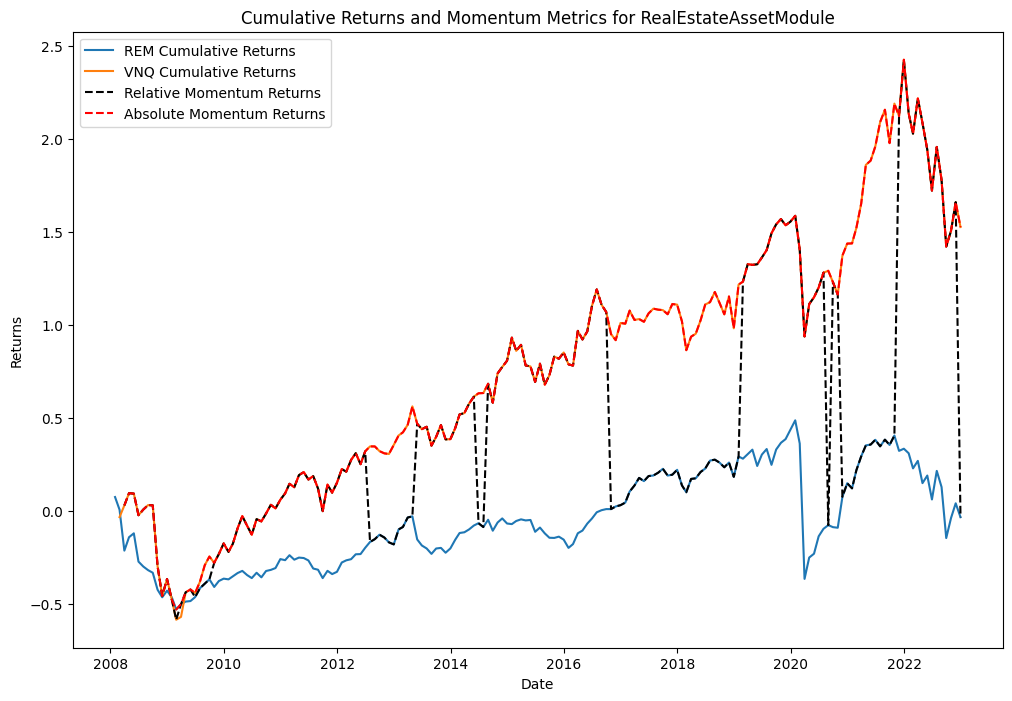


Data for GLD:
Column Names: ['Monthly Return']
            Monthly Return
Date                      
2008-01-31        0.108416
2008-02-29        0.052298
2008-03-31       -0.059992
2008-04-30       -0.041588
2008-05-31        0.009232

Data for TLT:
Column Names: ['Monthly Return']
            Monthly Return
Date                      
2008-01-31        0.020960
2008-02-29       -0.004554
2008-03-31        0.021389
2008-04-30       -0.024862
2008-05-31       -0.026883


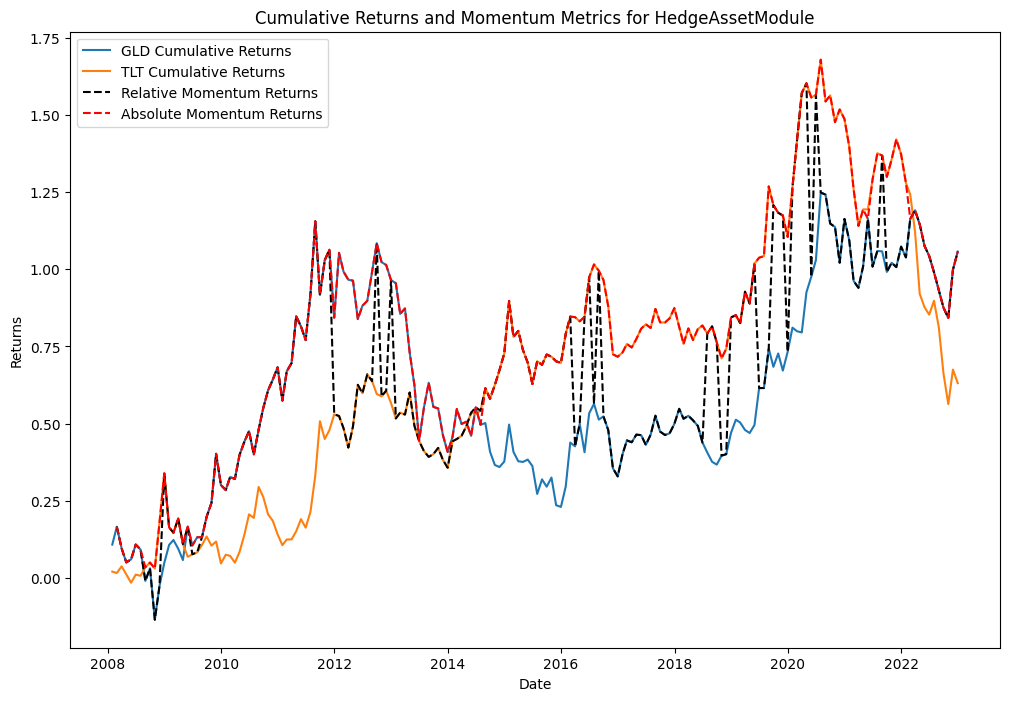

In [160]:
# Instantiate StockAssetModule
stock_module = StockAssetModule(data_folder)

# Fetch and display data
stock_module.fetch_data()
stock_module.calculate_monthly_returns(start_date, end_date)
stock_module.display_data()

# Calculate and plot metrics
stock_module.calculate_and_plot_metrics(start_date, end_date, holding_period=holding_period)

credit_risk_module = CreditRiskAssetModule(data_folder)

# Fetch and display data
credit_risk_module.fetch_data()
credit_risk_module.calculate_monthly_returns(start_date, end_date)
credit_risk_module.display_data()

# Calculate and plot metrics
credit_risk_module.calculate_and_plot_metrics(start_date, end_date, holding_period=holding_period)

real_estate_module = RealEstateAssetModule(data_folder)
hedge_module = HedgeAssetModule(data_folder)


real_estate_module.fetch_data()
real_estate_module.calculate_monthly_returns(start_date, end_date)
real_estate_module.display_data()

# Calculate and plot metrics
real_estate_module.calculate_and_plot_metrics(start_date, end_date, holding_period=holding_period)

hedge_module.fetch_data()
hedge_module.calculate_monthly_returns(start_date, end_date)
hedge_module.display_data()

# Calculate and plot metrics
hedge_module.calculate_and_plot_metrics(start_date, end_date, holding_period=holding_period)


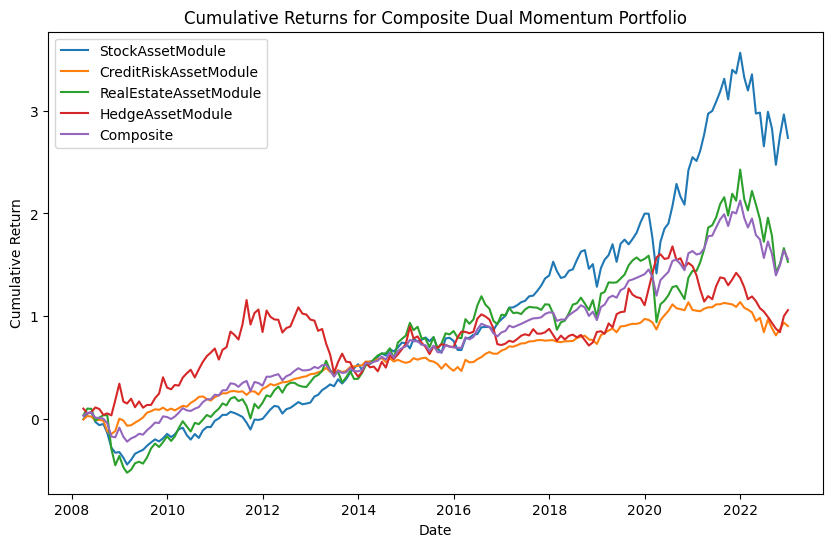

In [161]:
composite_returns['Composite'] = composite_returns.mean(axis=1)
plt.figure(figsize=(10, 6))
for column in composite_returns.columns:
    plt.plot(composite_returns.index, composite_returns[column], label=column)

plt.title('Cumulative Returns for Composite Dual Momentum Portfolio')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.show()

In [162]:
composite_returns

,StockAssetModule,CreditRiskAssetModule,RealEstateAssetModule,HedgeAssetModule,Composite
Date,,,,,
2008-03-31,-0.006082,-0.009409,0.030976,0.096410,0.027974
2008-04-30,0.047968,0.024241,0.096744,0.050813,0.054941
2008-05-31,0.060409,0.019032,0.094431,0.060514,0.058597
2008-06-30,-0.032767,-0.018414,-0.021748,0.108416,0.008872
2008-07-31,-0.064881,-0.012620,0.008729,0.092408,0.005909
...,...,...,...,...,...
2022-08-31,2.828495,0.880842,1.780680,0.931482,1.605375
2022-09-30,2.474566,0.810492,1.422770,0.875697,1.395881
2022-10-31,2.756963,0.871429,1.507689,0.842227,1.494577


In [194]:
def calculate_annualized_returns(returns_df):
    cumulative_returns = returns_df.iloc[-1]
    num_years = returns_df.shape[0] / 12
    annualized_returns = cumulative_returns - 1
    return annualized_returns

def calculate_maximum_drawdown(returns_df):
    drawdown_percent = ((returns_df + 1) / (returns_df + 1).cummax()) - 1
    max_drawdown = abs(drawdown_percent.min())
    return max_drawdown

def calculate_calmar_ratio(returns_df):
    annualized_returns = calculate_annualized_returns(returns_df)
    max_drawdown = calculate_maximum_drawdown(returns_df)
    calmar_ratio = annualized_returns / max_drawdown
    return calmar_ratio

def calculate_positive_returns_win_rate(returns_df):
    cumulative_returns = returns_df
    positive_returns = cumulative_returns.diff() > 0
    num_positive = positive_returns.sum()
    total_periods = cumulative_returns.shape[0] - 1  
    win_rate = num_positive / total_periods
    return win_rate


annualized_returns = calculate_annualized_returns(composite_returns)
max_drawdown = calculate_maximum_drawdown(composite_returns)
calmar_ratio = calculate_calmar_ratio(composite_returns)
winrate = calculate_positive_returns_win_rate(composite_returns)

performance_metrics = pd.DataFrame({
    'Annualized Returns': annualized_returns,
    'Max Drawdown': max_drawdown,
    'Calmar Ratio': calmar_ratio,
    'Winrate': winrate
})
performance_metrics_transposed = performance_metrics.T
performance_metrics_transposed

,StockAssetModule,CreditRiskAssetModule,RealEstateAssetModule,HedgeAssetModule,Composite
Annualized Returns,1.737276,-0.098365,0.527809,0.057240,0.555990
Max Drawdown,0.480262,0.171161,0.570253,0.346613,0.268217
Calmar Ratio,3.617352,-0.574694,0.925569,0.165141,2.072911
Winrate,0.672316,0.632768,0.598870,0.502825,0.604520
